In [35]:
import random
import numpy as np
import os      #We write a program that will run on both Windows and GNU/Linux.
import glob    #For useful easier file or extansion search
import cv2

In [36]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))# Every img converting to
    return resized                                    # 64x64 pixel 

In [37]:
def get_data():                    
    train_directory ="imgs/train/" # Data Directory
    X_train = []                   # For Train and Test we assign empty array.
    y_train = []
    
    for j in range(10):            # We'll pull the data sequentially from file.
        print("Load Folder c{}".format(j))
        path = os.path.join(train_directory, 'c' + str(j), '*.jpg') #c0, c1, c2 ...
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl) #Method is used to get 
                                          #the base name in specified path
            img = resize(fl, 64, 64)   # We convert the images to 64x64 size  
            X_train.append(img)  # And finally, we added the empty defined array.
            y_train.append(j)  # And then, for y_train set.
    return X_train, y_train

In [38]:
X_train, y = get_data()

Load Folder c0
Load Folder c1
Load Folder c2
Load Folder c3
Load Folder c4
Load Folder c5
Load Folder c6
Load Folder c7
Load Folder c8
Load Folder c9


In [39]:
X_train = np.asarray(X_train) # Convert the input to an array.
y = np.asarray(y)
print(X_train.shape), print(y.shape)

(22424, 64, 64, 3)
(22424,)


(None, None)

22424 pieces 64x64 colored image.    And 22434 pieces y value.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.25, random_state=42)
# Split arrays or matrices into random train and test subsets

In [41]:
#numpy.reshape(array, newshape, order='C')
#Gives a new shape to an array without changing its data

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)

Training data shape:  (16818, 12288)
Validation data shape:  (5606, 12288)


# For Linear Classifier and LinearSVM

We assign here as a function lineer_classifier.py, linear_svm.py, neural_net.py and last softmax.py prepared files.

In [42]:
#Training the Linear Classifier
"""
An object of class LinearSVM is trained over 
X_train for 1500 iterations using some hyperparameters, 
learning rate and regularization strength. 
These hyperparameters will be tuned to achieve best possible performance.
"""
from linear_classifier import LinearSVM # We implemented the ready code.

learning_rates = [9e-9, 1e-8, 8e-9]
regularization_strengths = [9e4, 7e4, 8e4]

results = {}         #Empty array for results.
best_val = -1        # The highest validation accuracy that we have seen so far.
best_svm = None     # The LinearSVM object that achieved the highest validation rate.

# For Tuning hyperparameters to get the best fit
for lr in learning_rates: # [9e-9, 1e-8, 8e-9]
    for reg in regularization_strengths: # [9e4, 7e4, 8e4]
        linearSVM = LinearSVM()
        # Training Code Block
        linearSVM.train(X_train, y_train, learning_rate =lr, reg=reg, num_iters=1500, verbose=False)
        # Prediction Values 
        y_train_pred = linearSVM.predict(X_train)
        y_val_pred = linearSVM.predict(X_val)
        # Training- and Validation Accuracy 
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = linearSVM
"""
A range of values is taken for learning rate as well as regularization strength,
the Linear SVM is then trained using these hyperparameters over 1500iterations
The model with the best validation accuracy is chosen 
due to it’s ability to best fit on unseen data
"""      
    
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 8.000000e-09 reg 7.000000e+04 train accuracy: 0.539006 val accuracy: 0.516768
lr 8.000000e-09 reg 8.000000e+04 train accuracy: 0.602569 val accuracy: 0.578666
lr 8.000000e-09 reg 9.000000e+04 train accuracy: 0.659294 val accuracy: 0.638780
lr 9.000000e-09 reg 7.000000e+04 train accuracy: 0.626234 val accuracy: 0.604888
lr 9.000000e-09 reg 8.000000e+04 train accuracy: 0.684148 val accuracy: 0.668748
lr 9.000000e-09 reg 9.000000e+04 train accuracy: 0.734689 val accuracy: 0.720478
lr 1.000000e-08 reg 7.000000e+04 train accuracy: 0.691937 val accuracy: 0.674813
lr 1.000000e-08 reg 8.000000e+04 train accuracy: 0.753776 val accuracy: 0.738673
lr 1.000000e-08 reg 9.000000e+04 train accuracy: 0.777381 val accuracy: 0.767570
best validation accuracy achieved during cross-validation: 0.767570


In [43]:
# Predetermined Learning Rate and Regularization Strengths Values are given as data input 
# for real iterations and loos values sequent calculation 

import matplotlib.pyplot as plt
linearSVM = LinearSVM()
loss_hist = linearSVM.train(X_train, y_train, learning_rate =1e-8, reg=9e4, num_iters=1500, verbose=True)
y_train_pred = linearSVM.predict(X_train)
y_val_pred = linearSVM.predict(X_val)
"""
Mean Absolute Error ( MAE ) is the measure of the 
difference between the two continuous variables. 
The MAE is the average vertical distance between each 
actual value and the line that best matches the data. 
MAE is also the average horizontal distance between each 
data point and the best matching line.

For Completely Explained at : 
https://vijay-choubey.medium.com/how-to-evaluate-the-performance-of-a-machine-learning-model-d12ce920c365
"""
train_accuracy = np.mean(y_train == y_train_pred)
val_accuracy = np.mean(y_val == y_val_pred)
print('train accuracy: %f val accuracy: %f' % (train_accuracy, val_accuracy))

iteration 0 / 1500: loss 11153.400019
iteration 100 / 1500: loss 7745.579761
iteration 200 / 1500: loss 5399.164228
iteration 300 / 1500: loss 3766.953306
iteration 400 / 1500: loss 2626.490619
iteration 500 / 1500: loss 1831.992675
iteration 600 / 1500: loss 1278.124956
iteration 700 / 1500: loss 892.322461
iteration 800 / 1500: loss 622.674840
iteration 900 / 1500: loss 434.546293
iteration 1000 / 1500: loss 304.612508
iteration 1100 / 1500: loss 213.288562
iteration 1200 / 1500: loss 149.946395
iteration 1300 / 1500: loss 105.357530
iteration 1400 / 1500: loss 74.098878
train accuracy: 0.777381 val accuracy: 0.767570


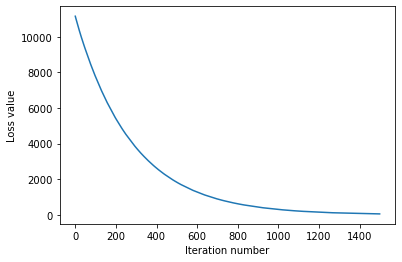

In [44]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.savefig("loss.jpg")